In this project, we will be using MNIST dataset, we will try to build a binary classfier.

MNIST dataset contains 70,000 images of handwritten numbers. each image is 28x28 pixels, so, every image has 784 features and each feature represents intensity of one pixel.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

# Fetching dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

D:\Python\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


3


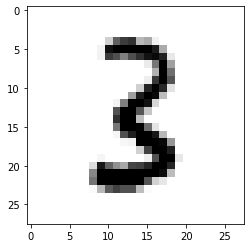

In [5]:
# plotting random digit
random_digit = X[50000]
random_digit_image = random_digit.reshape(28, 28)
plt.imshow(random_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
print(y[50000])

Since, MNIST dataset is already split into training and test set, we don't have to write a program for it. The first 60,000 images are training set and remaining 10,000 images are test set.

In [6]:
# Creating test and training set
X_train, X_test, y_train, y_test = X[0:60000], X[60000:], y[0:60000], y[60000:]

# Creating binary classifier

In [7]:
n = input("Enter any number between 0 to 9: ")
y_train_n = (y_train==n)
y_test_n = (y_test==n)

Enter any number between 0 to 9: 4


Note - In the rest of this notebook, I will be using n = 4, and all of the results written in markdown cells will be only for n = 4.

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model1 = SGDClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression(random_state=42)

In [9]:
model1.fit(X_train, y_train_n)
model1.predict([random_digit])

array([False])

In [10]:
model2.fit(X_train, y_train_n)
model2.predict([random_digit])

array([False])

In [11]:
model3.fit(X_train, y_train_n)
model3.predict([random_digit])

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False])

# Evaluating model performances

Unlike regression models where we can evaluate models using root mean square, cross validation sets, we cannot use the same methods on classification models. 

So, we will evaluate performance using different measures like confusion matrix, precision, recall, f1_score. Let us first evaluate performance of model1.

In [12]:
def generate_confusion_matrix(model, x_train, y_train, cv):
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix

    y_train_pred = cross_val_predict(model, x_train, y_train, cv=cv)
    matrix = confusion_matrix(y_train, y_train_pred)
    return matrix

In [13]:
generate_confusion_matrix(model1, X_train, y_train_n, 3)

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

The element at the position (11) in matrix denotes the number of images that were correctly classified as non-4 (They were not 4, they were some other number). 
The element at the position (12) in matrix denotes the number of images that were wrongly classified as 4 (They were some other digit than 4, but they got classified as 4). 
The element at the position (21) in matrix denotes the number of images that were 4, but they were classified as non-4 (They were classified as some other digit than 4). 
The element at the position (22) in matrix denotes the number of images that were correctly classified as 4 (They were 4, and they were classified as 4). 

In [14]:
def evaluate_prf1(model,train, pred):
    from sklearn.metrics import precision_score, recall_score, f1_score
    print(f"The Precision score for {model} is: ",precision_score(train, pred))
    print(f"The Recall score for {model} is: ",recall_score(train, pred))
    print(f"The F1 score for {model} is: ",f1_score(train, pred))

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred_model1 = cross_val_predict(model1, X_train, y_train_n, cv=3)
evaluate_prf1(model1, y_train_n, y_train_pred_model1)

The Precision score for SGDClassifier(random_state=42) is:  0.8149175527816305
The Recall score for SGDClassifier(random_state=42) is:  0.905169462512838
The F1 score for SGDClassifier(random_state=42) is:  0.8576757764982564


As we can see, the model1 has good recall score, but precision score is not good, let's evaluate model2. 

In [16]:
generate_confusion_matrix(model2, X_train, y_train_n, 3)

array([[54118,    40],
       [  709,  5133]], dtype=int64)

From the confusion matrix we can see that, 54118 images were correctly classified as non-4. 40 images were wrongly classified as 4. 709 images were classified as non-4 even if they were 4, and 5133 images were correctly classified as 4. 

In [17]:
y_train_pred_model2 = cross_val_predict(model2, X_train, y_train_n, cv=3)
evaluate_prf1(model2, y_train_n, y_train_pred_model2)

The Precision score for RandomForestClassifier(random_state=42) is:  0.992267543011792
The Recall score for RandomForestClassifier(random_state=42) is:  0.8786374529270797
The F1 score for RandomForestClassifier(random_state=42) is:  0.9320018157058556


As we can see that, model2 is performing way better than model1 when it comes to precision, but the recall score is lower than model1. 

Now, let's evaluate model3.

In [18]:
generate_confusion_matrix(model3, X_train, y_train_n, 3)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:

array([[53614,   544],
       [  578,  5264]], dtype=int64)

From the confusion matrix we can see that, 53614 images were correctly classified as non-4. 544 images were wrongly classified as 4. 578 images were classified as non-4 even if they were 4, and 5264 images were correctly classified as 4. 

In [19]:
y_train_pred_model3 = cross_val_predict(model3, X_train, y_train_n, cv=3)
evaluate_prf1(model3, y_train_n, y_train_pred_model3)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Precision score for LogisticRegression(random_state=42) is:  0.90633608815427
The Recall score for LogisticRegression(random_state=42) is:  0.9010612803834304
The F1 score for LogisticRegression(random_state=42) is:  0.9036909871244637


D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see, that this model is performing better than model1, but the precision and f1 score is lower than model2.

So, we will now proceed with model2, let's test our model2 on test set.

# Evaluating on test set

In [28]:
model2.fit(X_test, y_test_n)
model2.predict([random_digit])

array([False])

In [29]:
generate_confusion_matrix(model2, X_test, y_test_n, 3)

array([[9012,    6],
       [ 283,  699]], dtype=int64)

In [30]:
y_test_pred_model2 = cross_val_predict(model2, X_test, y_test_n, cv=3)
evaluate_prf1(model2, y_test_n, y_test_pred_model2)

The Precision score for RandomForestClassifier(random_state=42) is:  0.9914893617021276
The Recall score for RandomForestClassifier(random_state=42) is:  0.7118126272912424
The F1 score for RandomForestClassifier(random_state=42) is:  0.8286899822169532


We can improve the performance of this model by adding more images of 4, so, that model can recognize more ways of writing 4.

Let's save our model now. 

In [31]:
# saving the model
from joblib import dump, load
dump(model2, 'ml_project_mnist_binary_classifier.joblib')

['ml_project_mnist_binary_classifier.joblib']